In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from CGAN import loaddata, D, G
from matplotlib import pyplot as plt
from torchvision.utils import make_grid, save_image
from typing import Union

Auxiliary functions for displaying images ディスプレイ画像の補助関数

In [11]:
def showimg(img: torch.Tensor, mean: Union[int, float, tuple], std: Union[int, float, tuple], cmap: str = 'magma'):
    """
    Show the image
    画像を表示
    """
    if isinstance(mean, tuple):
        inv_img = torch.stack([img[chnl] * std[chnl] + mean[chnl] for chnl in range(len(mean))])#each channel is reverse standardized separately
    else:
        inv_img = torch.stack([img[0] * std + mean])#each channel is reverse standardized separately
    plt.imshow(torch.permute(inv_img.cpu(), (1, 2, 0)), cmap = cmap)#restore to (H X W X C) format
    plt.axis('off')
    plt.show()

Parameters pre-setting 事前のパラメータ設定

In [17]:
noise_len = 100#length of noise input
batch_size = 256#batch size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')#use GPU or CPU
print(torch.cuda.is_available())#is the GPU available

False


Test set テストセット

In [16]:
norm_trans = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])#normalize images
testset = loaddata(img_trans = norm_trans, type = 't10k')
test_loader = DataLoader(testset, batch_size = batch_size, shuffle = False, pin_memory = torch.cuda.is_available())

Load pre-saved model parameters ロード前に保存したモデルパラメータ

In [10]:
disc = D().to(device)#create a new model instance
disc.loadparam('./Discriminator.pth')#load previously saved model parameters
gen = G().to(device)#create a new model instance
gen.loadparam('./Generator.pth')#load previously saved model parameters

Test テスト

real labels of a batch in testset:
 tensor([8, 5, 1, 7, 6, 3, 4, 1, 8, 5, 8, 4, 3, 4, 8, 7, 8, 6, 7, 9, 0, 5, 7, 8,
        1, 7, 4, 3, 9, 6, 2, 7, 9, 3, 2, 0, 9, 1, 8, 7, 0, 6, 1, 5, 7, 1, 5, 1,
        2, 2, 1, 9, 3, 1, 4, 6, 9, 3, 8, 4, 8, 2, 6, 9, 4, 8, 5, 7, 5, 7, 7, 2,
        5, 3, 6, 5, 3, 9, 3, 6, 8, 0, 3, 1, 5, 1, 2, 8, 5, 7, 5, 9, 0, 9, 5, 5,
        3, 2, 2, 9, 9, 7, 8, 5, 3, 6, 0, 6, 2, 5, 7, 0, 2, 2, 8, 7, 3, 3, 2, 9,
        7, 0, 6, 7, 2, 7, 1, 8, 9, 5, 0, 3, 7, 5, 5, 2, 2, 7, 8, 3, 3, 8, 8, 3,
        0, 2, 1, 1, 4, 6, 8, 4, 9, 2, 8, 2, 5, 3, 6, 7, 9, 3, 9, 9, 0, 2, 6, 8,
        4, 6, 1, 7, 6, 8, 0, 6, 1, 3, 7, 5, 4, 2, 5, 4, 0, 2, 0, 8, 5, 1, 3, 3,
        6, 2, 8, 4, 7, 4, 3, 1, 2, 5, 0, 1, 3, 7, 3, 6, 9, 8, 3, 9, 3, 0, 6, 3,
        5, 5, 1, 3, 9, 5, 7, 9, 1, 1, 6, 7, 7, 5, 1, 7, 0, 7, 3, 6, 9, 4, 1, 7,
        6, 6, 4, 3, 1, 6, 8, 3, 5, 3, 8, 9, 3, 5, 3, 1])


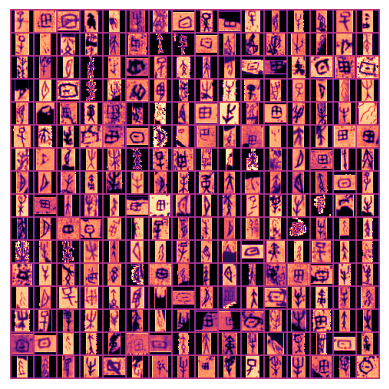

In [30]:
iter_test = iter(test_loader)
test_imgs, test_lbs = next(iter_test)
print('real labels of a batch in testset:\n', test_lbs)

showimg(make_grid(test_imgs, 16), 0.5, 0.5)

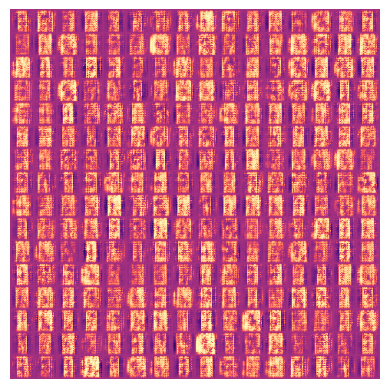

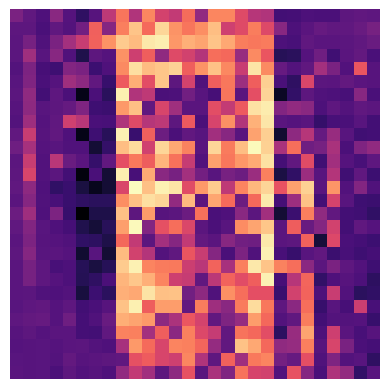

In [35]:
disc.eval()
gen.eval()
# torch.manual_seed(0)
noise = torch.randn(batch_size, noise_len).to(device)#generated nosie input
showimg(make_grid(gen(noise).detach(), 16), 0.5, 0.5)#A batch of images
showimg(make_grid(gen(noise).to(device).detach()[0], 1), 0.5, 0.5)#single image
save_image(make_grid(gen(noise).detach(), 16), './generated_images.png')#save generated images